<a href="https://colab.research.google.com/github/scadriano/lia1-2023-1/blob/main/Aula%2012%20-%20An%C3%A1lise%20Explorat%C3%B3ria%20de%20Dados%20/%20An%C3%A1lise_Explorat%C3%B3ria_SuperCenter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Projeto de Análise Exploratória de Dados - SuperCenter**

##**Setup do projeto**

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python neste Projeto:', python_version())

Versão da Linguagem Python neste Projeto: 3.10.11


In [ ]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

##**1. Carregando os dados**

In [ ]:
# Carrega o dataset e Cria o Dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/@Aula12-AnaliseExploratoriaDeDados/dataset.csv')

In [ ]:
# Tamanho do dataframe
df.shape

(9700, 11)

In [ ]:
# Amostra do Dataframe - 5 primeiras linhas
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
# Amostra do Dataframe - 5 últimas linhas
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


##**2. Análise Exploratória**

In [ ]:
# Colunas do Dataframe
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [ ]:
# Verificando o tipo de dado de cada coluna
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [ ]:
# Resumo estatístico da coluna - Valor_Venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [ ]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [ ]:
# Verificando de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

##**Pergunta de Negócio 1:**
##Qual a cidade com maior valor total de vendas de produtos da categoria 'Office Supplies'?

In [ ]:
# Primeiro filtra o dataframe com os registros da categoria desejada
df_p1 = df[df['Categoria'] == 'Office Supplies']

In [ ]:
# Em seguida agrupa por cidade e calcula o total de valor_venda
df_p1_total = df_p1.groupby('Cidade')['Valor_Venda'].sum()

In [ ]:
# Então encontramos a cidade com maior valor de venda
cidade_maior_venda = df_p1_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", cidade_maior_venda)

Cidade com maior valor de venda para 'Office Supplies': New York City


In [ ]:
# Para conferir o resultado encontrado
df_p1_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

##**Pergunta de Negócio 2:**
Qual o Total de Vendas Por Data do Pedido?
Demonstre o resultado em um gráfico de barras.

In [ ]:
# Calcula o total de vendas para cada data de pedido
df_p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [ ]:
# Visualiza a quantidade de vendas por data
df_p2.shape

(1226,)

In [ ]:
# Visualiza as 5 primeiras linhas
df_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

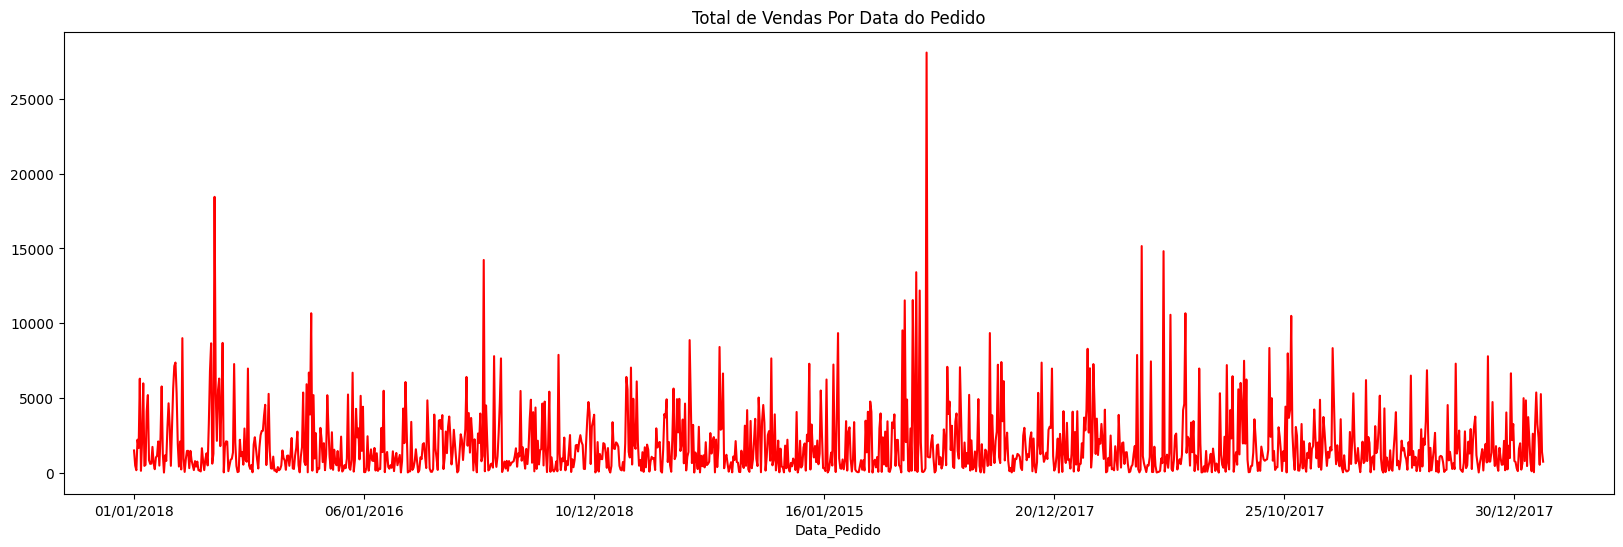

In [ ]:
# Gráfico com a resposta
plt.figure(figsize = (20, 6))
df_p2.plot(x = 'Data_Pedido', 
           y = 'Valor_Venda', 
           color = 'red')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

##**Pergunta de Negócio 3:**
Calcule o Total de Vendas por Estado e demonstre o resultado através de um gráfico de barras.

In [ ]:
# Agrupa por estado e calcula o total de vendas
df_p3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

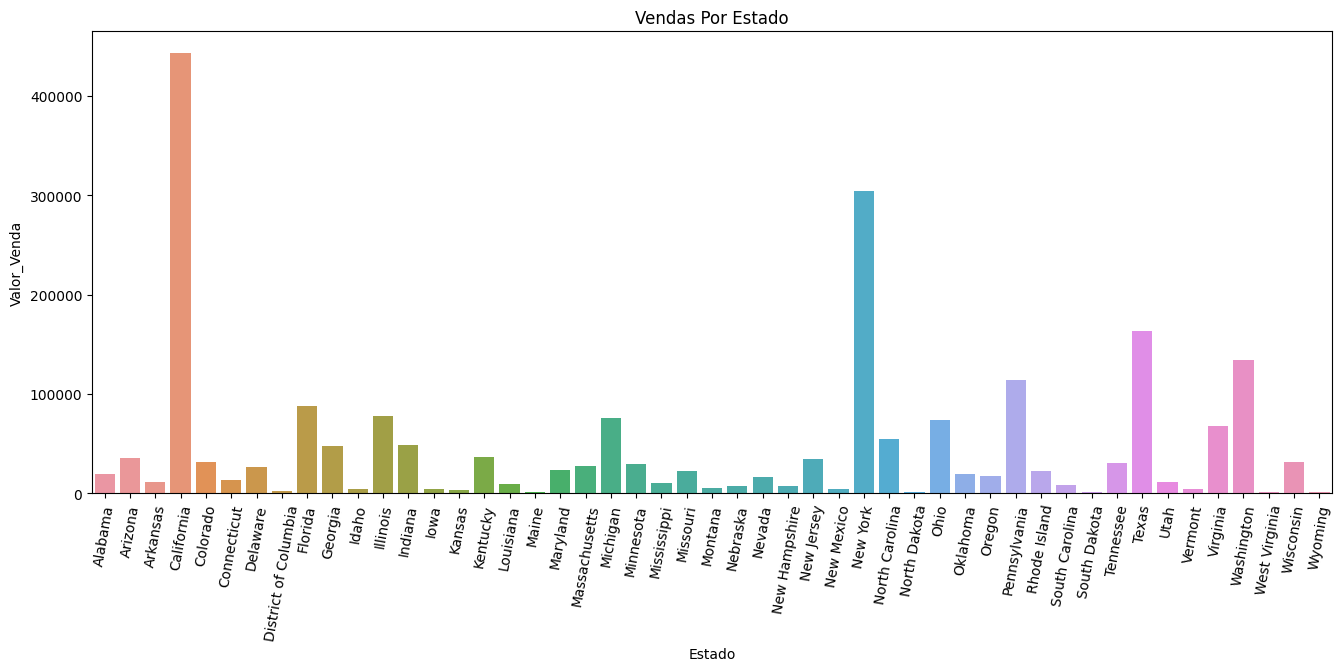

In [ ]:
# Gráfico com a resposta
plt.figure(figsize = (16, 6))
sns.barplot(data = df_p3, 
            y = 'Valor_Venda', 
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

##**Pergunta de Negócio 4:**

Identifique as 10 Cidades com Maior Total de Vendas e demonstre o resultado através de um gráfico de barras.

In [ ]:
# Agrupa por cidade, calculamos o total de vendas e ordenamos listando somente os 10 primeiros registros
df_p4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                    ascending = False).head(10)

In [ ]:
# Lista as 10 cidades com maior venda
df_p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


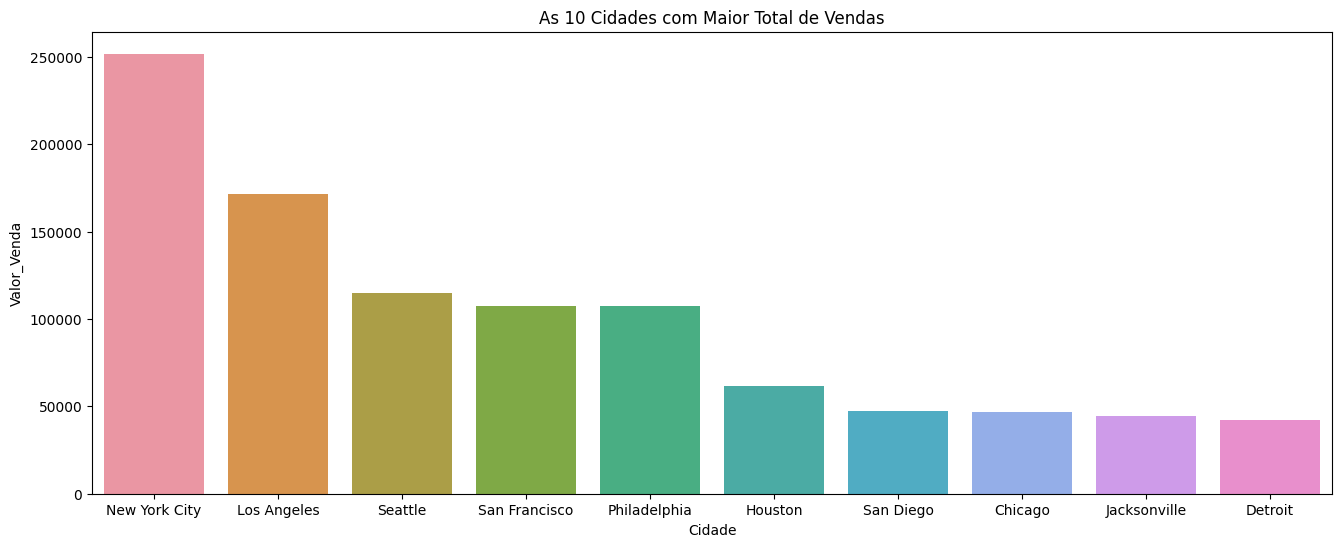

In [ ]:
# Gráfico com a resposta
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_p4, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

##**Pergunta de Negócio 5:**
Identifique qual segmento teve o Maior Total de Vendas e demonstre o resultado através de um gráfico de pizza.

In [ ]:
# Agrupa por segmento e calculamos o total de vendas
df_p5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                      ascending = False)

In [ ]:
# Lista as 10 cidades com maior venda
df_p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [ ]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

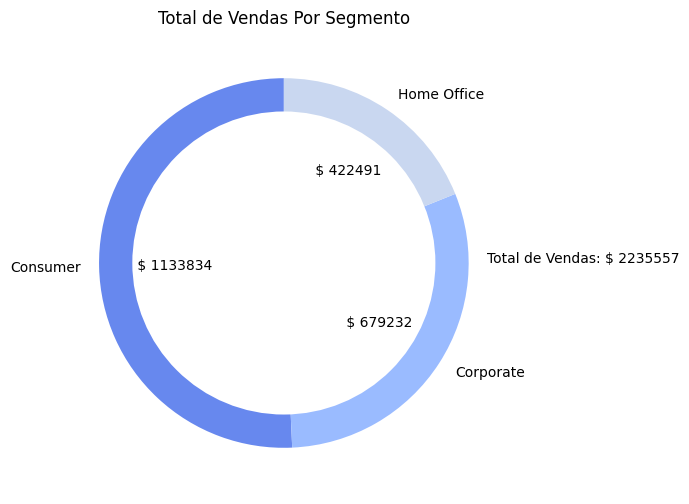

In [ ]:
# Gráfico com a resposta

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df_p5['Valor_Venda'], 
        labels = df_p5['Segmento'],
        autopct = autopct_format(df_p5['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_p5['Valor_Venda']))), xy = (1.1, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

##**Pergunta 6** (Nível Iniciante)
Qual o Total de Vendas Por Segmento e Por Ano?

##**Pergunta 7** (Nível Júnior)
Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

Se o Valor_Venda for maior que 1000 recebe 15% de desconto.

Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

Quantas Vendas Receberiam 15% de Desconto?

##**Pergunta 8** (Nível Master)
Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

##**Pergunta 9** (Nível Master Ninja)
Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
Demonstre o resultado através de gráfico de linha.

##**Pergunta 10** (Nível Master Ninja Galático)
Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

Demonstre tudo através de um único gráfico.
